### TODO: See Medium post about LinkedIn Network visualizations...

In [6]:
import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

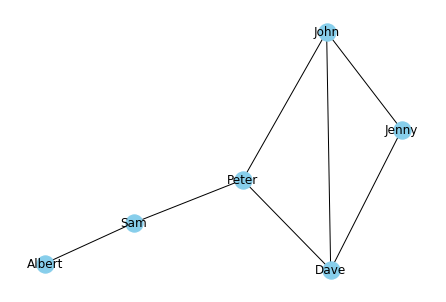

In [7]:
df = pd.DataFrame(
    [
        ("Dave", "Jenny"),
        ("Dave", "Jenny"),
        ("John", "Jenny"),
        ("Dave", "Peter"),
        ("Dave", "John"),
        ("Peter", "Sam"),
        ("Sam", "Albert"),
        ("Peter", "John"),
    ],
    columns=["from", "to"],
)

# nx seems to build a network-graph from a list of tuples :D

# An Undirected Graph
G = nx.from_pandas_edgelist(df, "from", "to")
nx.draw(G, with_labels=True, node_color="skyblue")
plt.show()

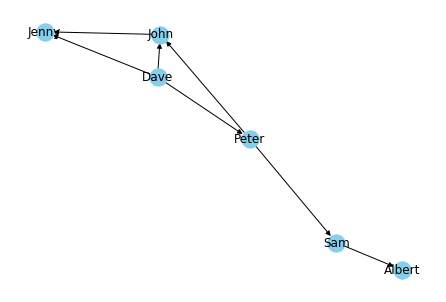

In [8]:
# A Directed Graph
Graph = nx.from_pandas_edgelist(
    df, source="from", target="to", create_using=nx.DiGraph()
)
nx.draw(Graph, with_labels=True, node_color="skyblue")
plt.show()

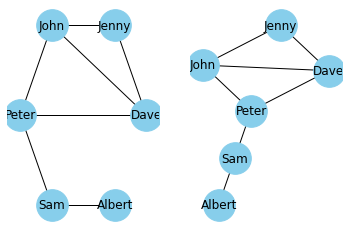

In [9]:
# Different graph layouts
G = nx.from_pandas_edgelist(df, source="from", target="to")

# circular
plt.subplot(121)
nx.draw_circular(G, with_labels=True, node_color="skyblue", node_size=1000)

# kamada-kawai force-directed layout
plt.subplot(122)
nx.draw_kamada_kawai(G, with_labels=True, node_color="skyblue", node_size=1000)

# bow
plt.show()

In [10]:
# NODE CENTRIC: on computing centrality...

# degree (# of edges connected to each node)
G = nx.from_pandas_edgelist(df, "from", "to")
G.degree()

DegreeView({'Dave': 3, 'Jenny': 2, 'John': 3, 'Peter': 3, 'Sam': 2, 'Albert': 1})

In [11]:
# closeness centrality (closeness to all other nodes in network [0:1]; (avg(SUM(shotest_path_to_each_node))/SUM(shotest_path_to_each_node))^-1
nx.closeness_centrality(G)

{'Dave': 0.625,
 'Jenny': 0.45454545454545453,
 'John': 0.625,
 'Peter': 0.7142857142857143,
 'Sam': 0.5555555555555556,
 'Albert': 0.38461538461538464}

In [15]:
# betweeness centrality (extent to which when there exists a shortest path between two nodes, this node lies in that path)
nx.betweenness_centrality(G)

{'Dave': 0.15000000000000002,
 'Jenny': 0.0,
 'John': 0.15000000000000002,
 'Peter': 0.6000000000000001,
 'Sam': 0.4,
 'Albert': 0.0}

In [13]:
# eigenvector centrality (# of nodes that are also connected to a given directly connected node)
nx.eigenvector_centrality(G, tol=1e-2)

{'Dave': 0.5242051914963224,
 'Jenny': 0.39005819367246036,
 'John': 0.5242051914963224,
 'Peter': 0.485680925454598,
 'Sam': 0.23045766292817327,
 'Albert': 0.09631066510431123}

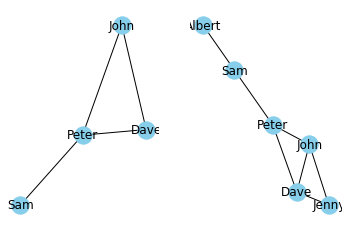

In [18]:
# on building EGOCENTRIC NETWORKS...

# nx.ego_graph get Peter's 1-level ego network
# for a 2-level ego network set argument order = 2 in make_ego_graph().
plt.subplot(121)

# get 1-level ego network for 'Peter'
G_ego = nx.ego_graph(G, "Peter")
nx.draw(G_ego, with_labels=True, node_color="skyblue")
plt.subplot(122)

# set radius=2 to get 2-level ego network
G_ego = nx.ego_graph(G, "Peter", radius=2)
nx.draw(G_ego, with_labels=True, node_color="skyblue")

In [21]:
# on computing network metrics...

# setup
degreeCount = collections.Counter(d for node, d in G.degree())

# Degree Distribution
degreeDistribution = [0] * (1 + max(degreeCount))
for degree, count in degreeCount.items():
    degreeDistribution[degree] = count

# Density
p = nx.density(G)

print(f"Degree Distribution: {degreeDistribution}, \nDensity: {p}")

Degree Distribution: [0, 1, 2, 3], 
Density: 0.4666666666666667


In [ ]:
# Link Prediction; "If presented with a network, can you predict the next link to form?"
# see pg 488 - pg 490 in src